# Regression

The main task of this dataset is a regression task of predicting the age of abalone from from its physical measurements. Abalone is a genus of marine gastropod mollusks in the family Haliotidae and the only cataloged genus of this family. It is very enjoyed in Asian cuisine, and its age is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope.

The description of the variables is:
* **Sex:** M, F, and I (infant);
* **Length:** Longest shell measurement;
* **Diameter:** perpendicular to length;
* **Height:** with meat in shell;
* **Whole weight:** whole abalone;
* **Shucked weight:** weight of meat;
* **Viscera weight:** gut weight (after bleeding);
* **Shell weight:** after being dried;
* **Rings:** +1.5 gives the age in years.

In [1]:
#Inicial Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

%matplotlib inline

In [2]:
#Dataset header
names = ['Sex', 'Length', 'Diameter', "Height", 'Whole_weight', 
         'Shucked_weight', 'Viscera_weight', 'Shell_weight', "Rings"]

In [3]:
#Importing the data
abalone = pd.read_table("C:/Users/Eduardo/Documents/Acadêmicos/Bases de Dados/abalone.DATA", 
                        names = names, delimiter = ',')

## Preprocessing

The abalone dataset is defined by 4177 instances and 9 columns (1 target and 8 features):

In [4]:
#shape of the database
abalone.shape

(4177, 9)

Let's take a quick look at the first five instances of our dataset:

In [5]:
#Quick look
abalone.head()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


We can see that the "Sex" feature is coded as 'M', 'F' or 'I'. For convinience, we are going to change those to F=0, M=1, I=2

In [6]:
#changing Sex labels to 0 or 1
abalone['Sex'].replace(['F', 'M', 'I'], [0, 1, 2], inplace = True)

In order to having the "Sex" feature working as categorical variable (not as integer), we can change its data type from int to  object:

In [7]:
abalone['Sex'] = abalone['Sex'].astype('object')

In [8]:
abalone.head()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,1,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,1,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,2,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [9]:
#For some further purpose
abalone2 = abalone.copy()

Another important point to check is the presence of null values in any column. We can easily do that by doing:

In [10]:
#Checking for null values
abalone.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole_weight      0
Shucked_weight    0
Viscera_weight    0
Shell_weight      0
Rings             0
dtype: int64

None of the columns have any null value and that is always a good scenario to work with.

Checking the data types can be very handy, in case of we getting some error future error. Let's check it out:

In [11]:
abalone.dtypes

Sex                object
Length            float64
Diameter          float64
Height            float64
Whole_weight      float64
Shucked_weight    float64
Viscera_weight    float64
Shell_weight      float64
Rings               int64
dtype: object

An example of good practice when working with a dataset is checking for duplicated observations. in general, it is common to face the need to gather data from multiple sources, which can cause repetition of informations. To check for duplicated data, we can simply do:

In [12]:
#Checking for duplicated information
abalone.duplicated().sum()

0

As we can see, the dataset does not have duplicated rows.

## Exploratory Data Analysis

Another really important part of the work with any dataset, the exploratory data analysis is a handy tool box able to help us get some important insights. We can start using the describe method:

In [13]:
abalone.describe()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


Considering the results from the table above, we can draw a lot of conclusions, some are: 
* The abalone mean age was 9.93(rings)+1.5 = 11.43 years;
* The abalone longest shell measuremnt found was 0.81 mm;
* The abalone minimum diameter found was 0.055 mm;
* The 25% of abalone with the highest Heights (with meat in shell) were above 0.165 mm;
* The median of the whole weights of abalone was 0.8 grams;
* The maximum number of rings found was 29;
* The standart deviation was relatively high for some features.

Let's ask for some statistics considering our categorical variable as reference:

In [14]:
print((abalone["Sex"].value_counts()/len(abalone['Sex']))*100)

1    36.581278
2    32.128322
0    31.290400
Name: Sex, dtype: float64


Now we know that 36.58% of the abalone are male, 32.13% are female and 31.29% are infant. Well balanced classes!

Althought 'Sex' is not our target variable for a regression task, we can use it as reference to obtain some simple but importante informations about our numerical features. Let's group our features by 'Sex' and take the mean:

In [15]:
print(abalone.groupby("Sex").mean())

       Length  Diameter    Height  Whole_weight  Shucked_weight  \
Sex                                                               
0    0.579093  0.454732  0.158011      1.046532        0.446188   
1    0.561391  0.439287  0.151381      0.991459        0.432946   
2    0.427746  0.326494  0.107996      0.431363        0.191035   

     Viscera_weight  Shell_weight      Rings  
Sex                                           
0          0.230689      0.302010  11.129304  
1          0.215545      0.281969  10.705497  
2          0.092010      0.128182   7.890462  


We can see that, in average, the female abalone are much bigger, heavier and have more rings than male abalone. Although there is some difference between the characteristics of male and female, it does not seem so significant. However, for obvious reasons, the differences between adult abalone and infant abalone are very clear. Based on that, we could propose some transformation to the 'Sex' feature, considering the status of an abalone as been adult or not, it seems that would be more impactant to the model. Let's keep this feature the way it is for now.

Another good practice action is to visualize the distribuition of the features. It can be very hand for some approaches such as hypotesis tests, checking model assumptions (commonly done in statistical approaches) etc. Let's ask for some histograms:

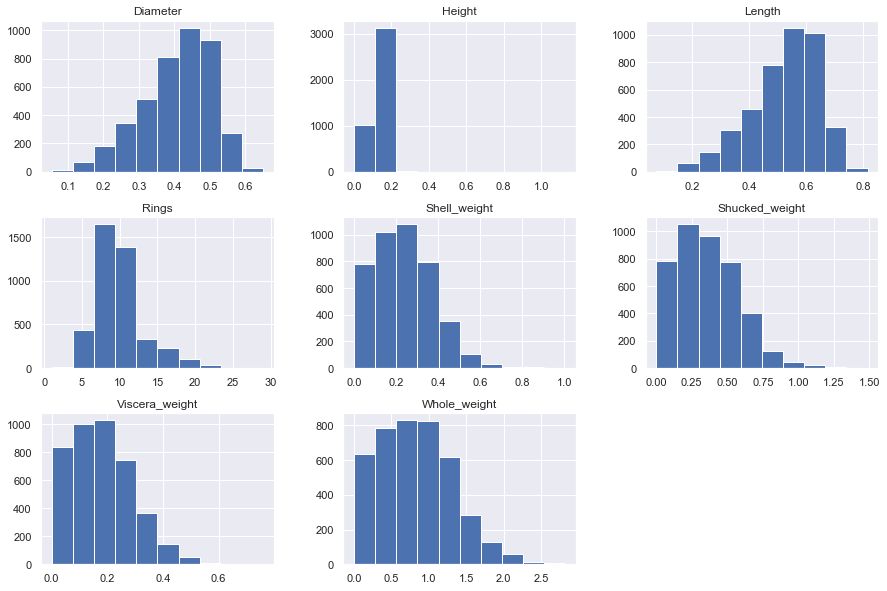

In [16]:
abalone.hist(bins = 10, figsize = (15, 10));

From the histograms above we can conclude that 'Diameter' and 'Length' are distributed in a very similar way. We can also see great similarities among all the weight features.

Some observations can be really harmful to statistical/machine learning models and even to simple data analysis if not handled correctly. This observations are called outliers. Outliers are data points distributed away from most of the data, and it happens because they are either too small or too big. These observations can be resulted from tons of reasons.

A definition of outlier tells us that an observation that is beyond the inner fence should be considered a moderate outlier, while an observation that is beyond the outer fence should be considered an extreme outlier. The inner fence is given by the product of the interquartile range (quartil3 - quartil1) and the constant 1.5, then this number is added to the third quartile and subtracted by the first quartile. The outer fence is found the same way, just changing 1.5 by 3.

Let's creat a function to find these fellas:

In [17]:
def outliers(dataset, data, drop_mod = False, drop_ext = False):
    l1 = []
    l2 = []
    for var in data.columns:
        data_var = data[var]
        Q1 = np.percentile(data_var, 25.) # 25th percentile
        Q3 = np.percentile(data_var, 75.) # 75th percentile
        IQR = Q3-Q1 #Interquartile Range
        outlier_mod = IQR * 1.5 #to find the inner fence
        outlier_ext = IQR * 3 #to find the outer fence
        
        outliers1 = data_var[~((data_var >= Q1 - outlier_mod) & (data_var <= Q3 + outlier_mod))].index.tolist() #inner fence
        outliers2 = data_var[~((data_var >= Q1 - outlier_ext) & (data_var <= Q3 + outlier_ext))].index.tolist() #outer fence 
        l1.append(len(outliers1)) #total of moderate outliers by feature
        l2.append(len(outliers2)) #total of extreme outliers by feature
    
    df = pd.concat([pd.Series(l1).rename("Moderate"), pd.Series(l2).rename("Extreme")], axis = 1)
    df.index = data.columns
    
    print("The Total of Atipical Observation is:")
    print("--"*25)
    print(df)
        
    if  drop_mod:
        dataset.drop(outliers1, inplace = True, errors = 'ignore')
        print('--'*25)
        print("All the Moderate Outliers Have Been Removed")  
    if drop_ext:
            dataset.drop(outliers2, inplace = True, errors = 'ignore')  
            print('--'*25)
            print("All the Extreme Outliers Have Been Removed")

Now, let's define the features (numerical) to search in:

In [18]:
var_list = ['Length', 'Diameter', "Height", 'Whole_weight', 
         'Shucked_weight', 'Viscera_weight', 'Shell_weight', "Rings"]

We are going to use the 'outliers' function to check how many moderate and extreme outliers are in each feature, asking the function to drop only the extreme ones:

In [19]:
outliers(abalone, abalone[var_list], drop_mod = False, drop_ext = True)

The Total of Atipical Observation is:
--------------------------------------------------
                Moderate  Extreme
Length                49        0
Diameter              59        0
Height                29        2
Whole_weight          30        0
Shucked_weight        48        1
Viscera_weight        26        1
Shell_weight          35        1
Rings                278       36
--------------------------------------------------
All the Extreme Outliers Have Been Removed


Now we got:

In [20]:
abalone.shape

(4141, 9)

If you take a quick look at the outliers table, you will see that a relatively high number of moderate outliers was found in every feature, it indicates that by nature, some abalone have specific characteristics that difers them from the most abalone in the dataset. In other words, it would be very unlikely that at least 20% of this observations are derived from human mistake or miscalibration of the abalone characteristics. We can remove all these 'outliers' but that would be a source of bias for a small dataset, considering the fact the we have over 4000 instances, we can actually try that.

Now that we talked about outliers, let's see how the numerical features are related to each other calling for the correlation matrix:

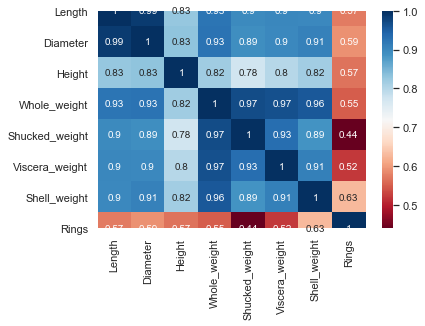

In [21]:
corr = abalone.corr()
sns.heatmap(corr, xticklabels = corr.columns, yticklabels = corr.columns, cmap = 'RdBu', annot = True)

Some important points can be discussed based on this correlation matrix. Taking a look at our target (Rings), we can see that there are a level of linear relation with the features (values close to 0.6), however considering that we are going to use linear based regression models, we would like to have relations a bit higher (something over 0.7).

Another important thing to pay attention is the fact that most features are highly correlated to each other. It was expected since we have 3 size features and 4 weight features. This fact would certainly lead us to a multicolinearity scenario, and it tells us that we probably should consider a model with fewer features, since some of them are "telling the same thing".

## Modeling

In [22]:
#Import for the machine learning
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

The models that we are going to use are: Linear Regression, Stochastic Gradient Descent Regressor and Random Forest Regressor. Let's train them:

In [23]:
#defining the target and features
target = abalone['Rings']
features = abalone.drop('Rings', axis = 1)

In [24]:
#splitting the data in train and test sets (houldout)
Xtrain, Xtest, ytrain, ytest = train_test_split(features, target, test_size = 0.30, random_state = 97)

In [25]:
#Standerdizing the features
scaler = StandardScaler()
Xtrain = scaler.fit_transform(Xtrain)
Xtest  = scaler.fit_transform(Xtest)

In [26]:
#List of models to be used in training loop
models = [LinearRegression(),
          SGDRegressor(random_state = 97),
          RandomForestRegressor(random_state = 97)]

To train the model, let's run a for loop training every model using the standerdized features and evaluating them with the negative mean squared error. A 10-fold cross-validation was applied.

In [27]:
for mod in models:
    mod.fit(Xtrain, ytrain)
    model = mod.__class__.__name__
    
    results = cross_val_score(mod, Xtrain, ytrain, scoring = 'neg_mean_squared_error', cv = 10)
    RMSE = np.sqrt(-results)
    
    print("--"*12)
    print(model)
    print("Mean: ", RMSE.mean())
    print("Standard Deviation: ", RMSE.std())
    print("--"*12)

------------------------
LinearRegression
Mean:  2.1434547615514545
Standard Deviation:  0.15979324372131012
------------------------
------------------------
SGDRegressor
Mean:  2.160426288404305
Standard Deviation:  0.16815436740230605
------------------------


D:\Python\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


------------------------
RandomForestRegressor
Mean:  2.1343478349061904
Standard Deviation:  0.10304142196902716
------------------------


As we can see, the three models performed with pretty closed results, but considering both the means of root mean squared errors and the standard deviations, we decided to go with the Random Forest Regressor.

Now that we choose the Random Forest Regressor, we can do what we call 'Grid Search Cross-validation' to search for the best hyperparameters. Using the 'right' hyperparameters can improve the performance of the model significantly in certain cases. For the RandomForestRegressor, the hyperparameters are 'n_estimators' and 'max_features'. First of all, we have to determine an interval of possibilities, a list or dictionary to be searched in. Let's do it:

In [28]:
from sklearn.model_selection import GridSearchCV

grid = [{'n_estimators': [10, 50, 100],
         'max_features': [2, 4, 6, 8]}]

RFR = RandomForestRegressor(random_state = 97)

GSearch = GridSearchCV(RFR, grid, cv = 6, scoring = 'neg_mean_squared_error' )

GSearch.fit(Xtrain, ytrain)

GridSearchCV(cv=6, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=97,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid=[{'max_features': [2, 4, 6, 8],
  

So, as we can see below, after the grid search is done we can check for the best hyperparameters for our model, which were 'max_features:2' and 'n_estimators:100'.

Two features was said to be the best choice and that 'proves' what we saw before, correlated features telling the same thing. We can always drop some of them and still keep an informative and good performer model.

In [29]:
GSearch.best_params_

{'max_features': 2, 'n_estimators': 100}

Now we can have the best possible model to make predictions. Let's make some predictions and evaluate them:

In [30]:
from sklearn.metrics import mean_squared_error

final_model = GSearch.best_estimator_
ypred = final_model.predict(Xtest)

In [31]:
ytest.reset_index(drop = True, inplace = True)
print(pd.concat([ytest.rename('Observed'), pd.Series(ypred).rename('Predicted')], axis=1))

      Observed  Predicted
0           12       8.86
1            9      11.50
2            9       9.26
3            9       9.43
4            7       7.63
...        ...        ...
1238         4       5.58
1239         7       7.69
1240        16      15.16
1241         8       7.90
1242        19      13.15

[1243 rows x 2 columns]


Comparing the observed and predicted values, we can see that our model performed pretty well, with a final RMSE of 1.90 as we can see below:

In [32]:
MSE = mean_squared_error(ytest, ypred)
RMSE = np.sqrt(MSE)
print(RMSE)

1.9037008881651984


# Classification

For the classification task let's leave our first dataset alone and use the copy 'abalone2'dataset that we have created back there:

In [33]:
abalone2.head()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,1,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,1,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,2,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


For for this case, our target variable is "Sex". We know that this variable has 3 classes (Male, Female and Infant) and something important to say considering this situation is that there are a lot possible approaches to handle multiclass classification, however because of the nature of the "Sex" variable in our case, we are going to consider a new consolidation of classes that will lead us to a binary classification problem.

We have seen in the descriptives statistics that male and female abalone are not that different from each other, however the infant abalone have some clear physical differences comparing to both male and female abalone. Because of that, we can think of male and female as an "Adult" class, and then we would have two classes with greater variability between them. So, let's join male and female:

In [34]:
#Replacing class '0' for '1', joining male and female, and also changing infant abalone from '2' to '0'.
abalone2['Sex'].replace([0, 2], [1, 0], inplace = True)

In [35]:
abalone2['Sex']

0       1
1       1
2       1
3       1
4       0
       ..
4172    1
4173    1
4174    1
4175    1
4176    1
Name: Sex, Length: 4177, dtype: int64

Before we unified the male and female classes, we had a well balanced "Sex" variable where the 3 classes had close percentage representation. Now that we have 2 classes, one of them has almost twice the size of the other and that is reasonable problem of imbalanced classes:

In [36]:
abalone2['Sex'].value_counts()/len(abalone2['Sex'])

1    0.678717
0    0.321283
Name: Sex, dtype: float64

### Handling Inbalanced Classes

Imbalanced classes is a problem for a lot of machine learning classification algorithms, since some of them were designed based on the assumption that we have balanced classes. This problem can produce poor classification results, mainly involving the minor class.

A lot of Scikit-learn algorithms has a "weight" parameter to deal with imbalanced classes, however we are going to deal with it using a strategy called "downsampling". Downsampling as the name suggests, works reducing the size of the major class to be equal to the size of the minor class. Considering that we have a "big" dataset, that will not be a problem.

In [37]:
target2 = abalone2['Sex']
features2 = abalone2.drop('Sex', axis = 1)

First, we'll create two numpy arrays of indexes, one for class '0' and one for class '1' and then we'll create two more objects to indicate the length of the arrays. After that, we can produce a "new class 1" by sampling randomly one observation of class 1 for every observation of class 0 (without replacement). That will result in an array of the same size as class 0.

In [38]:
#Indices
class0 = np.where(target2==0)[0]
class1 = np.where(target2==1)[0]

#Number of observation in each class
n_class0 = len(class0)
n_class1 = len(class1)

#From every observation of class 0, randomly sample from class 1
#without replacement
new_class1 = np.random.choice(class1, size = n_class0, replace = False)

Now, we have to join both classes in a new target vector:

In [39]:
#Join class 0's target vector with the new_class1's target vector
n_target = np.hstack((target2[class0], target2[new_class1]))

In [40]:
#Checking the sizes of the classes
unique, counts = np.unique(n_target, return_counts=True)
print(np.asarray((unique, counts)).T)

[[   0 1342]
 [   1 1342]]


As we did with the target vector, we have to join "both classes features matrices". As we are dealing with a Pandas DataFrame, we can do that with the following line of code:

In [41]:
#Join class 0's feature matrix with new_class1's feature matrix
n_features = np.vstack((features2.iloc[class0, :], features2.iloc[new_class1, :]))

## Modeling

For this task, we are going to use the Logistic Regression, K-NN Classifier and the Random Forest Classifier. The training steps are done in exactly the same way as in the regression task, but as we are dealing with classification, we have to change the evaluation metric.

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [43]:
Xtrain, Xtest, ytrain, ytest = train_test_split(features2, target2, test_size = 0.30, random_state = 97)

In [44]:
Xtrain = scaler.fit_transform(Xtrain)
Xtest  = scaler.fit_transform(Xtest)

In [45]:
models = [LogisticRegression(solver = 'liblinear'),
          KNeighborsClassifier(),
          RandomForestClassifier(random_state = 97)]

**Obs:** Solvers: 'lbfgs', 'sag' and 'saga' of LogisticRegression can only handle l2 penalty, so in order to do a grid search for the best penalty, we set 'liblinear' to be the solver.

In [46]:
for mod in models:
    mod.fit(Xtrain, ytrain)
    model = mod.__class__.__name__
    
    results = cross_val_score(mod, Xtrain, ytrain, scoring = 'f1', cv = 10)
    
    print('--'*12)
    print(model)
    print('Mean: ', np.mean(results))
    print('Standard Deviation: ', np.std(results))

------------------------
LogisticRegression
Mean:  0.8795673231546199
Standard Deviation:  0.009283719064534346
------------------------
KNeighborsClassifier
Mean:  0.876958103430114
Standard Deviation:  0.013971025393616953


D:\Python\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


------------------------
RandomForestClassifier
Mean:  0.8689884644167645
Standard Deviation:  0.006979585482725951


The results were pretty close, but looking at both mean and standard deviation of f1-score, we choose the logistic classifier to go with.

Now, let's search for the best hyperparameters:

In [47]:
#LogisticRegression has 2 hyperparameters to find:
grid = [{'penalty': ['l1', 'l2'],
         'C': np.logspace(0, 4, 10)}]

In [48]:
LR_clf = LogisticRegression(solver = 'liblinear')

GSearch = GridSearchCV(LR_clf, grid, cv = 6, scoring = 'f1')
GSearch.fit(Xtrain, ytrain)

GridSearchCV(cv=6, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='liblinear',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid=[{'C': array([1.00000000e+00, 2.78255940e+00, 7.74263683e+00, 2.15443469e+01,
       5.99484250e+01, 1.66810054e+02, 4.64158883e+02, 1.29154967e+03,
       3.59381366e+03, 1.00000000e+04]),
                          'penalty': ['l1', 'l2']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=Fa

So the best hyperparameters were:

In [49]:
GSearch.best_params_

{'C': 464.15888336127773, 'penalty': 'l1'}

Now we can make some predictions and evaluate them:

In [50]:
final_clf = GSearch.best_estimator_
ypred = final_clf.predict(Xtest)

In [51]:
ytest.reset_index(drop = True, inplace = True)
print(pd.concat([ytest.rename('Observed'), pd.Series(ypred).rename('Predicted')], axis=1))

      Observed  Predicted
0            1          1
1            1          0
2            1          1
3            1          1
4            0          1
...        ...        ...
1249         1          1
1250         1          1
1251         0          0
1252         1          1
1253         0          0

[1254 rows x 2 columns]


Text(30.5, 0.5, 'Observed')

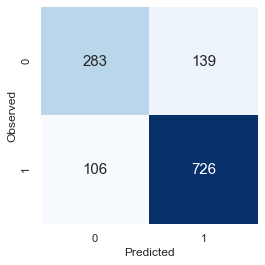

In [52]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(ytest, ypred)
ax = sns.heatmap(cm, square = True, annot = True, cbar = False, cmap = 'Blues', fmt = 'g', 
            annot_kws  = {'size': 15})
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.xlabel('Predicted')
plt.ylabel('Observed')

Our Logistic classifier did reasonably well, classifying 1009 observation correctly out of 1254. This resulted in the following metrics:

In [53]:
from sklearn.metrics import f1_score, accuracy_score

print('The final f1_score was: {}'.format(f1_score(ytest, ypred)))
print('The Final Accuracy was: {}'.format(accuracy_score(ytest, ypred)))

The final f1_score was: 0.8556275780789628
The Final Accuracy was: 0.8046251993620415
